<a href="https://colab.research.google.com/github/KyleEtera/MAT422/blob/main/4_1_and_4_2_Graphs_and_Graph_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**4.1 Introduction**

**4.1.1 Graph Models** - A Graph is a mathematical structure that consists of a set of nodes and a set of edges that connect the nodes. We can represent them as G = (V, E) where V is the set of nodes and E is the set of edges. A graph is considered connected if each node is connected to atleast 1 other node.

Graphs can come 5 ways:
*   **Directed** - Each edge has a direction, like a one way street
*   **Undirected** - None of the edges have a direction, like a two way street
*  ** Weighted** - Each edge has an associated weight, like the time it takes to travel the street between two lights
*   **Unweighted** - None of the edges have a direction, like a street with no known travel time
*   **Mixed** - Any combination of the four graphs, including graphs with both directed and undirected or weighted and unweighted edges.

A path is a sequence of nodes that are connected by edges, a cycle is a path that starts and ends at the same node. The degree of a node is its number of connected edges.

A graph is called a:
*   **Tree** - Graph with no cycles
*   **Forest** - Graph with no cycles, but is connected
*   **Spanning Tree** - Tree with all nodes in the Graph
*   **Spanning Forest** - Forest with all nodes in the Graph
*   **n-hop neighborhood** - The set of nodes that are at most n hops away from the node




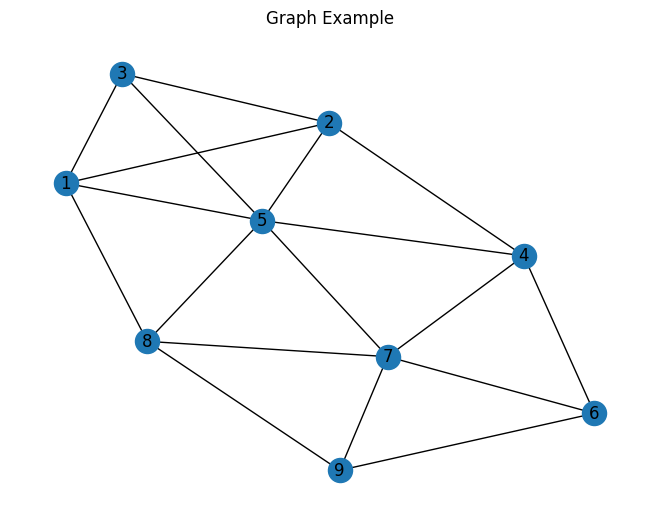

In [14]:
import matplotlib.pyplot as plt, networkx as nx, numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs

G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9])

G.add_edges_from([
    (1, 2), (1, 3), (1, 5), (1, 8),
    (2, 3), (2, 4), (2, 5),
    (3, 5),
    (4, 5), (4, 6), (4, 7),
    (5, 7), (5, 8),
    (6, 7), (6, 9),
    (7, 8), (7, 9),
    (8, 9),
])

nx.draw(G, with_labels=True)
plt.title("Graph Example")
plt.show()

**4.1.2 Laplacian Matrix** - An **Adjacency Matrix** is a matrix representation of a graph with each node being given a row and column for the graph. If there is a connection between two nodes, it's intersection will have a 1, otherwise there will be a 0.

A **Degree Matrix** is a matrix representation of the number of degrees each node has, i.e. the number of edges connected to each node

A **Laplacian Matrix** is a matrix representation of the both of these matrices subtracted from each other.

An **Incidence Matrix** is a matrix representation of a graph with each node being given a row and each edge being given a column. 0 represents no connection, 1 represents that the node is the first node in the edge, -1 representing that the node is the second node in the edge.

In [15]:
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1 1 0 1 0 0 1 0]
 [1 0 1 1 1 0 0 0 0]
 [1 1 0 0 1 0 0 0 0]
 [0 1 0 0 1 1 1 0 0]
 [1 1 1 1 0 0 1 1 0]
 [0 0 0 1 0 0 1 0 1]
 [0 0 0 1 1 1 0 1 1]
 [1 0 0 0 1 0 1 0 1]
 [0 0 0 0 0 1 1 1 0]]


In [16]:
def laplacian_matrix(graph: nx.Graph):
    """Get the Laplacian Matrix of a Graph"""
    _adj = nx.adjacency_matrix(graph)
    _diag = np.diag(np.sum(_adj, axis=1))
    return _diag - _adj

L = laplacian_matrix(graph=G)
print(L)

[[ 4 -1 -1  0 -1  0  0 -1  0]
 [-1  4 -1 -1 -1  0  0  0  0]
 [-1 -1  3  0 -1  0  0  0  0]
 [ 0 -1  0  4 -1 -1 -1  0  0]
 [-1 -1 -1 -1  6  0 -1 -1  0]
 [ 0  0  0 -1  0  3 -1  0 -1]
 [ 0  0  0 -1 -1 -1  5 -1 -1]
 [-1  0  0  0 -1  0 -1  4 -1]
 [ 0  0  0  0  0 -1 -1 -1  3]]


**Spectral Graph Bipartitioning** - Similar to both kmeans and support vector machines, we are looking for a line that best splits the graph by minimizing the amount of edges between two different splits, called the cut, then assigning the cluster based off where each node is relative to the splitting line. This is different from kmeans as we are not looking for the minimum distance between the node and the cluster center, but the minimum connections between two different splits.

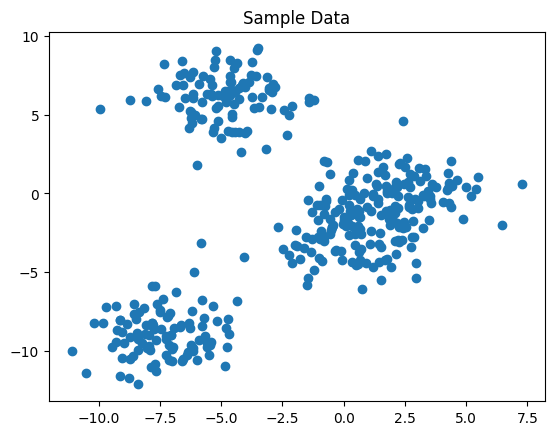

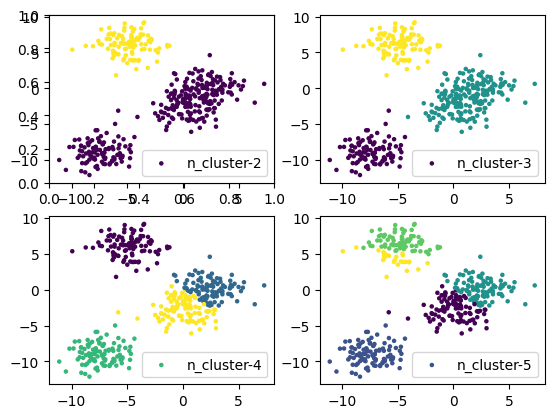

In [55]:
x, _ = make_blobs(n_samples=400, centers=4, cluster_std=1.5)

plt.scatter(x[:,0], x[:,1])
plt.title("Sample Data")
plt.show()

sc = SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=4, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=None )

f = plt.figure()
f.add_subplot(2, 2, 1)
for i in range(2, 6):
 sc = SpectralClustering(n_clusters=i).fit(x)
 f.add_subplot(2, 2, i-1)
 plt.scatter(x[:,0], x[:,1], s=5, c=sc.labels_, label="n_cluster-"+str(i))
 plt.legend()

plt.show()

Sources: [aaronye888](https://github.com/aaronyu888/mat-494-notebooks/blob/main/Spectral_Graph_Bipartitioning.ipynb) and [punitarani](https://github.com/punitarani/MAT-494/blob/master/4.1%20Network%20Analysis%20Introduction.ipynb)